In [11]:
using Plots, LinearAlgebra, SparseArrays, Printf

# Exercise 2.6 (a)

In [1]:
using LinearAlgebra
using SparseArrays
using Plots

# Function to solve the BVP u''(x) + u(x) = 0
function solve_bvp(a, b, α, β, m1)
    # Set up the grid
    m2 = m1 + 1  # total number of points
    h = (b - a) / m1  # grid spacing
    x = collect(range(a, stop=b, length=m2))  # grid points
   # x = range(a, stop=b, length=m2) |> collect

    
    # Set up the matrix A (sparse matrix)
    A = spzeros(m2, m2)

    # Internal points with the equation u''(x) + u(x) = 0
    for i in α:m1
        A[i, i-1] = 1 / h^2
        A[i, i]   = -2 / h^2 + 1  # 1 ---> +u(x) term
        A[i, i+1] = 1 / h^2
    end

    # Boundary conditions (Dirichlet)
    A[1, 1] = 1  # u(a) = α
    A[m2, m2] = 1  # u(b) = β

    # Right-hand side vector F
    F = zeros(m2)
    F[1] = α  # Apply boundary condition at x = a
    F[m2] = β  # Apply boundary condition at x = b

    # Solve the linear system A * U = F for U
    U = A \ F

    # Return grid points and computed solution
    return x, U
end

solve_bvp (generic function with 1 method)

In [2]:
# Plot the solution and compare it to the exact solution
function plot_solution(a, b, α, β, m1)
    x, U = solve_bvp(a, b, α, β, m1)

    # Exact solution based on problem setup (for comparison)
    exact_solution = α * cos.(x) + (β - α * cos(b) / sin(b)) * sin.(x)

    # Plot the numerical and exact solutions
    plot(x, U, label="Numerical Solution", marker=:o, xlabel="x", ylabel="u(x)", legend=:topleft)
    plot!(x, exact_solution, label="Exact Solution", linestyle=:dash)
end



plot_solution (generic function with 1 method)

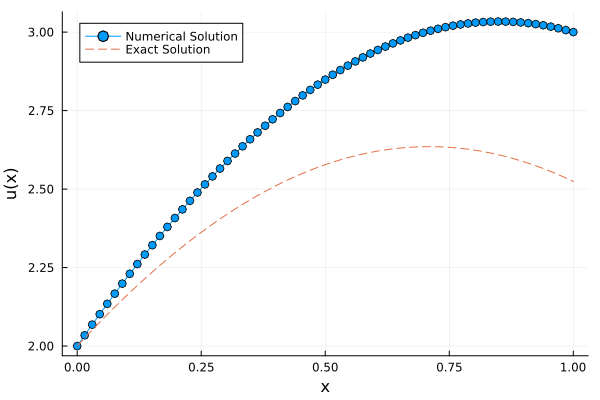

In [15]:
# Solving part (a) with a = 0, b = 1, α = 2, β = 3
a = 0
b = 1
α = 2
β = 3
m1 = 66  # Number of grid intervals (you can change this value)

plot_solution(a, b, α, β, m1)


# Exercise 2.6 (b)

In [48]:
using Plots

# Function to solve the BVP u''(x) + u(x) = 0 
function generate_solution(α)
    # Define the solution function u(x) = α * cos(x)
    u(x) = α * cos(x)
    return u
end

# Plotting function to visualize the solution for a given α
function plot_solution(α)
    a = 0           # Left boundary (x = 0)
    b = π           # Right boundary (x = π)

    # Generate the solution function using the generator
    u = generate_solution(α)

    # Generate points to plot the solution
    x_vals = range(a, stop=b, length=100)  # 100 points from 0 to π
    u_vals = u.(x_vals)                    # Compute u(x) for all points

    # Plot the solution
    plot(x_vals, u_vals, label="u(x) = $α * cos(x)", xlabel="x", ylabel="u(x)", legend=:topright)
    title!("Solution to u''(x) + u(x) = 0 with u(0) = $α, u(π) = -$α")
end



plot_solution (generic function with 2 methods)

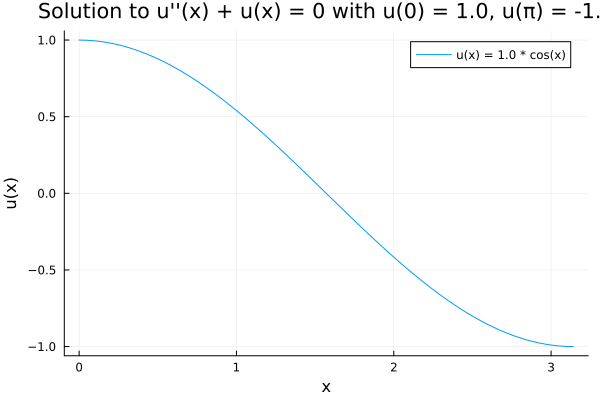

In [52]:
# Plotting solutions for different values of α
plot_solution(1.0)  # a = 1.0


In [62]:
using Plots

# Function to solve the BVP u''(x) + u(x) = 0
function generate_solution(α)
    # Define the solution function u(x) = α * cos(x)
    u(x) = α * cos(x)
    return u
end

# Plotting function to visualize the solutions for multiple values of α
function plot_multiple_solutions(α_values)
    a = 0           # Left boundary (x = 0)
    b = π           # Right boundary (x = π)

    # Generate points to plot the solution
    x_vals = range(a, stop=b, length=100)  # 100 points from 0 to π

    # Plot the first solution to initialize the plot
    for (i, α) in enumerate(α_values)
        # Generate the solution function using the generator
        u = generate_solution(α)
        u_vals = u.(x_vals)  # Compute u(x) for all points

        # Plot the solution
        if i == 1
            # For the first plot, use plot() to initialize
            plot(x_vals, u_vals, label="α = $α", xlabel="x", ylabel="u(x)", legend=:top)
        else
            # For subsequent plots, use plot!() to add to the existing plot
            plot!(x_vals, u_vals, label="α = $α")
        end
    end

    title!("Solutions to u''(x) + u(x) = 0 with u(0) = α and u(π) = -α")
end


plot_multiple_solutions (generic function with 1 method)

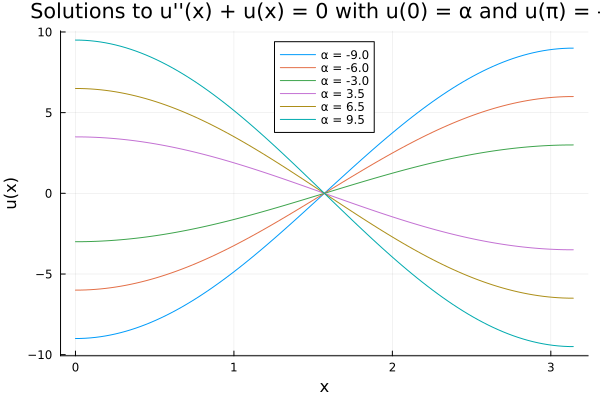

In [63]:

# Plotting multiple solutions for different values of α
α_values = [-9.0,-6.0,-3.0, 3.5, 6.5, 9.5]  # Different α values to plot
plot_multiple_solutions(α_values)


# Exercise 2.6 (c)

In [78]:
using SparseArrays
using LinearAlgebra
using Plots

# Function to solve the boundary value problem using finite differences
function solve_bvp_fdm(a, b, α, β, m1)
    m2 = m1 + 1  # Total number of points including boundaries
    h = (b - a) / m1  # Grid spacing
    x = collect(range(a, stop=b, length=m2))  # Grid points

    # Set up the matrix A (sparse matrix for efficiency)
    A = spzeros(m2, m2)

    # Fill the matrix for interior points using the finite difference scheme
    for i in 2:m1
        A[i, i-1] = 1 / h^2
        A[i, i]   = -2 / h^2 + 1
        A[i, i+1] = 1 / h^2
    end

    # Boundary conditions (Dirichlet)
    A[1, 1] = 1  # u(0) = α
    A[m2, m2] = 1  # u(b) = β

    # Right-hand side vector F
    F = zeros(m2)
    F[1] = α  # Apply boundary condition at x = a
    F[m2] = β  # Apply boundary condition at x = b

    # Solve the linear system A * U = F for U
    U = A \ F

    # Return grid points and computed solution
    return x, U
end

# Function to plot the solution and study the convergence as h -> 0
function plot_bvp_convergence(a, b, α, β, m1_values)
    for (i, m1) in enumerate(m1_values)
        # Solve the BVP for each grid size
        x, U = solve_bvp_fdm(a, b, α, β, m1)
        
        # Plot the solution
        if i == 1
            plot(x, U, label="m1 = $m1", xlabel="x", ylabel="u(x)", legend=:bottomright)
        else
            plot!(x, U, label="m1 = $m1")
        end
    end

    # Add a title to the plot
    title!("Solutions as h -> 0")
end



plot_bvp_convergence (generic function with 1 method)

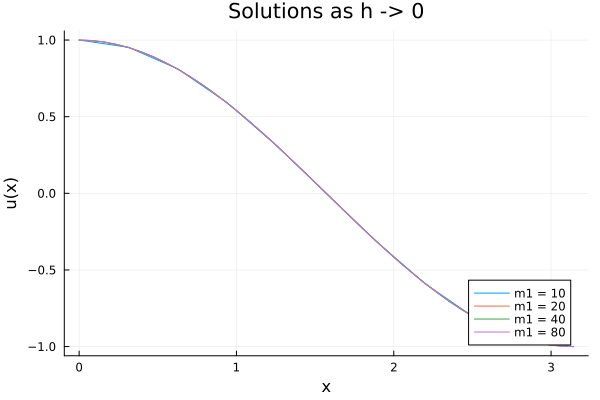

In [80]:
# Solving the BVP with u(0) = 1 and u(π) = -1
a = 0
b = π
α = 1.0  # Boundary condition at x = 0
β = -1.0  # Boundary condition at x = π

# Different grid sizes to study convergence
m1_values = [10, 20, 40, 80]  # Different numbers of intervals

# Plotting the convergence for u(π) = -1
plot_bvp_convergence(a, b, α, β, m1_values)



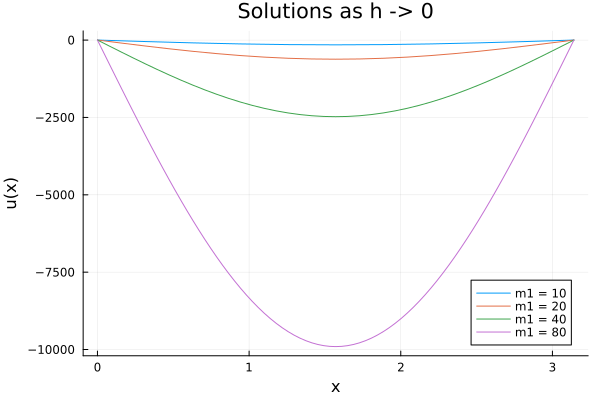

In [75]:

# Now changing the boundary condition to u(π) = 1 and plot again
β = 1.0  # New boundary condition at x = π
plot_bvp_convergence(a, b, α, β, m1_values)


# Exercise 2.6 (d)

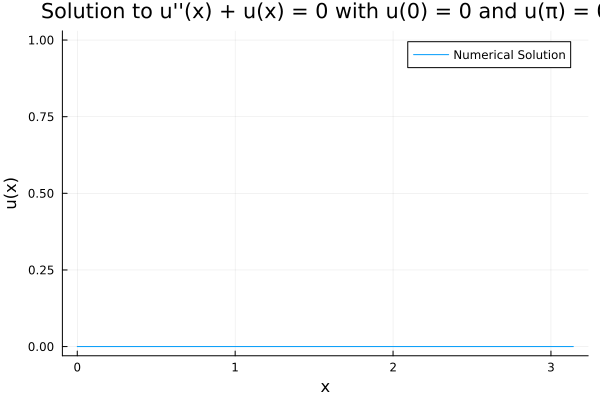

In [8]:
using SparseArrays
using LinearAlgebra
using Plots

# Function to solve the boundary value problem using finite differences
function solve_bvp_zero_boundary(a, b, m1)
    m2 = m1 + 1  # Total number of points including boundaries
    h = (b - a) / m1  # Grid spacing
    x = collect(range(a, stop=b, length=m2))  # Grid points

    # Set up the matrix A (sparse matrix for efficiency)
    A = spzeros(m2, m2)

    # Fill the matrix for interior points using the finite difference scheme
    for i in 2:m1
        A[i, i-1] = 1 / h^2
        A[i, i]   = -2 / h^2 + 1
        A[i, i+1] = 1 / h^2
    end

    # Boundary conditions (Dirichlet: u(0) = 0 and u(π) = 0)
    A[1, 1] = 1  # u(0) = 0
    A[m2, m2] = 1  # u(π) = 0

    # Right-hand side vector F
    F = zeros(m2)
    F[1] = 0  # Boundary condition at x = 0
    F[m2] = 0  # Boundary condition at x = π

    # Solve the linear system A * U = F for U
    U = A \ F

    # Return grid points and computed solution
    return x, U
end

# Plotting the solution to visualize the trivial solution
function plot_zero_solution(a, b, m1)
    # Solve the BVP
    x, U = solve_bvp_zero_boundary(a, b, m1)

    # Plot the solution
    plot(x, U, label="Numerical Solution", xlabel="x", ylabel="u(x)", legend=:topright)
    title!("Solution to u''(x) + u(x) = 0 with u(0) = 0 and u(π) = 0")
end

# Example: Solving the BVP with u(0) = 0 and u(π) = 0
a = 0
b = π
m1 = 50  # Number of intervals for discretization

# Plotting the solution
plot_zero_solution(a, b, m1)
